In [6]:
# importing libraries
options(warn=-1)
library(ggplot2)
library(h2o)
#If there is a proxy: proxy.old <- Sys.getenv('http_proxy'); Sys.setenv('http_proxy'='');
localH2O =  h2o.init(nthreads = -1, port = 54321, max_mem_size = '6G', startH2O = TRUE)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         17 minutes 44 seconds 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.0.1 
    H2O cluster version age:    27 days  
    H2O cluster name:           H2O_started_from_R_vyomc_ncj261 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.75 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.1 (2019-07-05) 



In [29]:
error.rate <- function(Y1, T1){
  if (nrow(Y1)!=nrow(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/nrow(T1))
}

In [13]:
# reading the data
labeled.frame = h2o.importFile(path = 'C:\\Users\\vyomc\\Downloads\\Dataset and Sample code\\Dataset and Sample code\\Task2C_labeled.csv' ,sep=',') 
unlabeled.frame = h2o.importFile(path = 'C:\\Users\\vyomc\\Downloads\\Dataset and Sample code\\Dataset and Sample code\\Task2C_unlabeled.csv' ,sep=',') 
test.frame = h2o.importFile(path = 'C:\\Users\\vyomc\\Downloads\\Dataset and Sample code\\Dataset and Sample code\\Task2C_test.csv' ,sep=',') 

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [14]:
labeled.frame[,1] <- as.factor(labeled.frame$label)
unlabeled.frame[,1] <- NA
train.frame <- h2o.rbind(labeled.frame[,-1], unlabeled.frame[,-1])
test.frame[,1] <- as.factor(test.frame$label)

In [15]:
reconstruction.train.error <- matrix(NA, nrow=20, ncol=2)
classification.labeled.error <- matrix(NA, nrow=20, ncol=2)

reconstruction.test.error <- matrix(NA, nrow=20, ncol=2)
classification.test.error <- matrix(NA, nrow=20, ncol=2)

In [20]:
i = 1
for (k in seq(20, 400, 20)){
    # build a neural network classifier based on the labeled training data
    NN.model <- h2o.deeplearning(    
      x = 2:ncol(labeled.frame), # select all pixels + extra features
      training_frame = labeled.frame, # specify the frame (imported file)    
      hidden = k, # number of layers and their units
      epochs = 50, # maximum number of epoches  
      activation = 'Tanh', # activation function 
      autoencoder = TRUE, # is it an autoencoder? Yes!
      l2 = 0.1
    )
    r.error = mean(h2o.anomaly(NN.model, labeled.frame))
    reconstruction.train.error[i,1] = k
    reconstruction.train.error[i,2] = r.error
    i = i + 1
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

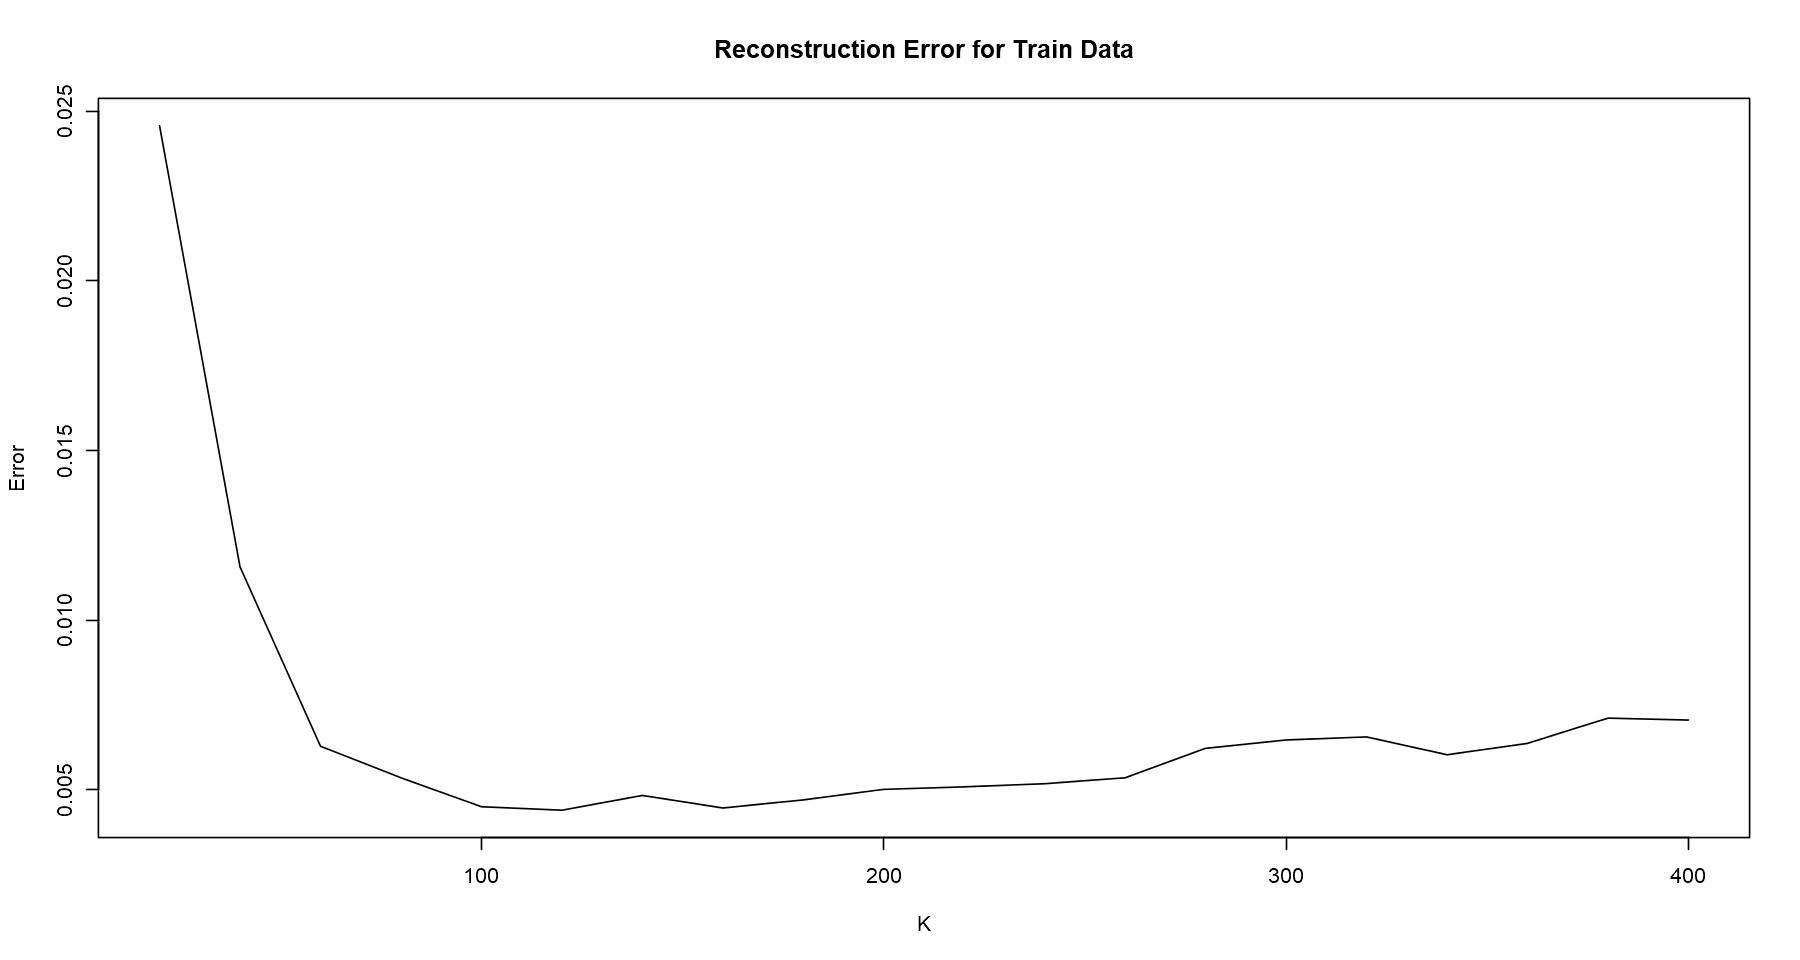

In [27]:
options(repr.plot.width=15, repr.plot.height=8)
# visualizing reconstrustion error with different values of k
plot(reconstruction.train.error, xlab = 'K', ylab = 'Error', main='Reconstruction Error for Train Data', type = 'line')

In [30]:
i = 1
for (k in seq(20, 400, 20)){
    # build a neural network classifier based on the labeled training data
    NN.model <- h2o.deeplearning(    
      x = 2:ncol(labeled.frame), # select all pixels + extra features
      y = 1,
      training_frame = labeled.frame, # specify the frame (imported file)    
      hidden = k, # number of layers and their units
      epochs = 50, # maximum number of epoches  
      activation = 'Tanh', # activation function 
      autoencoder = FALSE, # is it an autoencoder? Yes!
      l2 = 0.1
    )
    
    test.predict = h2o.predict(NN.model, test.frame)$predict
    test.error = error.rate(test.frame$label, test.predict)
    classification.test.error[i,1] = k
    classification.test.error[i,2] = test.error
    i = i + 1
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

In [31]:
classification.test.error

20,0.358
40,0.610
60,0.558
80,0.516
100,0.536
120,0.575
140,0.496
160,0.518
180,0.333
200,0.543
220,0.501
